In [1]:
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt

from sqlalchemy import create_engine

non_country_list = ["World", "High income","Latin America & Caribbean (excluding high income)", 
                    "OECD members", "Post-demographic dividend", "IDA total", "North America",
                    "Europe & Central Asia", "European Union", "East Asia & Pacific", "Euro area",
                    "IDA & IBRD total", "Low & middle income", "Middle income", "IBRD only",
                    "Upper middle income", "Late-demographic dividend", "Early-demographic dividend",
                    "Latin America & Caribbean", "Latin America & the Caribbean (IDA & IBRD countries)",
                    "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)",
                    "Lower middle income", "Middle East & North Africa", 
                    "Europe & Central Asia (IDA & IBRD countries)", "Arab World",
                    "Europe & Central Asia (excluding high income)", "South Asia", "South Asia (IDA & IBRD)",
                    "Middle East & North Africa (excluding high income)", 
                    "Middle East & North Africa (IDA & IBRD countries)", "Central Europe and the Baltics",
                    "Sub-Saharan Africa (IDA & IBRD countries)", "Sub-Saharan Africa",
                    "Sub-Saharan Africa (excluding high income)", "IDA only", "Pre-demographic dividend",
                    "Fragile and conflict affected situations", "Least developed countries: UN classification",
                    "IDA blend", "Heavily indebted poor countries (HIPC)", "Low income", "Small states",
                    "Other small states", "Caribbean small states", "Pacific island small states"]


rds_connection_string = "economy_development_db.sqlite"

In [2]:
engine = create_engine(f'sqlite:///{rds_connection_string}')

In [30]:
pd.read_sql_query('select * from economy_development', con=engine).tail(10)

,Unnamed: 0,country_name,country_code,indicator_name,indicator_code,year,value
51456,51456,"Venezuela, RB",VEN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,9.079000
51457,51457,Virgin Islands (U.S.),VIR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,8.357000
51458,51458,Vietnam,VNM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,1.894000
51459,51459,Vanuatu,VUT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,5.398000
51460,51460,World,WLD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,4.935884
51461,51461,Samoa,WSM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,8.457000
51462,51462,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,12.809000
51463,51463,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,27.320999
51464,51464,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,7.145000
51465,51465,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2019,4.898000


In [20]:
yearlyData = pd.read_sql_query('SELECT * FROM economy_development WHERE year=2000 AND indicator_code = "NY.GDP.MKTP.CD"', con=engine)
yearlyData.head(100)

,Unnamed: 0,country_name,country_code,indicator_name,indicator_code,year,value
0,10040,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2000,1.873453e+09
1,10041,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2000,NaN
2,10042,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,2000,9.129595e+09
3,10043,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,2000,3.480355e+09
4,10044,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,2000,1.434430e+09
5,10045,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,2000,7.351880e+11
6,10046,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,2000,1.043370e+11
7,10047,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,2000,2.842040e+11
8,10048,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,2000,1.911564e+09
9,10049,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,2000,NaN


In [5]:
yearlyData = yearlyData.drop(['indicator_name','indicator_code','year'], axis=1)
yearlyData = yearlyData.loc[:, ~yearlyData.columns.str.contains('^Unnamed')]
yearlyData = yearlyData.dropna()
yearlyData.head()

,country_name,country_code,value
0,Aruba,ABW,1.873453e+09
2,Angola,AGO,9.129595e+09
3,Albania,ALB,3.480355e+09
4,Andorra,AND,1.434430e+09
5,Arab World,ARB,7.351880e+11


In [6]:
result =yearlyData.sort_values(by=['value'])
result.tail(20)

,country_name,country_code,value
223,Latin America & the Caribbean (IDA & IBRD coun...,TLA,2.174350e+12
127,Latin America & Caribbean,LCN,2.286930e+12
58,Early-demographic dividend,EAR,3.295340e+12
135,Late-demographic dividend,LTE,3.402210e+12
236,Upper middle income,UMC,4.558740e+12
112,Japan,JPN,4.887520e+12
96,IBRD only,IBD,5.804800e+12
148,Middle income,MIC,5.850970e+12
133,Low & middle income,LMY,5.985800e+12
97,IDA & IBRD total,IBT,6.262970e+12


In [7]:
result = result[~result['country_name'].isin(non_country_list)]
result.tail(100)

,country_name,country_code,value
138,Latvia,LVA,7.937759e+09
21,"Bahamas, The",BHS,8.076470e+09
229,Trinidad and Tobago,TTO,8.154338e+09
67,Ethiopia,ETH,8.242392e+09
25,Bolivia,BOL,8.397913e+09
111,Jordan,JOR,8.460424e+09
185,Paraguay,PRY,8.855705e+09
152,Myanmar,MMR,8.905066e+09
110,Jamaica,JAM,8.985353e+09
107,Iceland,ISL,9.003639e+09


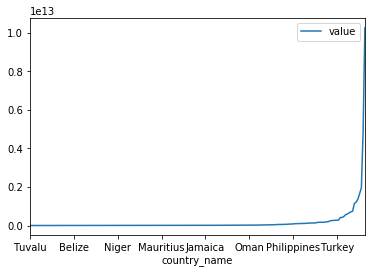

In [8]:
result.plot(x="country_name",y="value",kind="line")

In [9]:
def addListTogether(gdpList):
    dataPoints = []
    
    currentTotal = 0
    
    for i in range(len(gdpList)):
        currentTotal = currentTotal + gdpList[i]
        dataPoints.append(currentTotal)
        
    return dataPoints

In [10]:
def createGiniCurve(year):
    yearlyData = pd.read_sql_query(f'SELECT * FROM economy_development WHERE year={year} AND indicator_code = "NY.GDP.MKTP.CD"',con=engine)
    
    yearlyData = yearlyData.drop(['indicator_name','indicator_code','year'], axis=1)
    yearlyData = yearlyData.loc[:, ~yearlyData.columns.str.contains('^Unnamed')]
    yearlyData = yearlyData.dropna()
    
    result = yearlyData.sort_values(by=['value'])

    result = result[~result['country_name'].isin(non_country_list)]
    
    orderedGdpList = result['value'].to_list()
    countryNameList = result['country_name'].to_list()
    
    dataPoints = addListTogether(orderedGdpList)

    return countryNameList, dataPoints

In [11]:
x_value, y_value = createGiniCurve(2018)

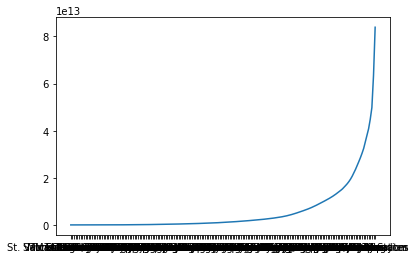

In [12]:
plt.plot(x_value,y_value) 

In [13]:
x_value, y_value = createGiniCurve(2000)

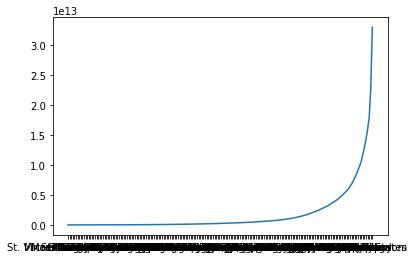

In [14]:
plt.plot(x_value,y_value) 

In [15]:
def getYearlyData(year, metric):
    data = pd.read_sql_query(f'SELECT * FROM economy_development WHERE year={year} AND indicator_code = {metric}', con=engine)
    return data

In [16]:
result = result.set_index('country_name')

In [17]:
result.to_csv("result.csv")

In [18]:
def getYearlyData(year, metric):
    data = pd.read_sql_query(f'SELECT * FROM economy_development WHERE year={year} AND indicator_code = "{metric}"', con=engine)
    data = data.drop(['indicator_name','indicator_code','year'], axis=1)
    data = data.dropna()
    
    data = data[~data['country_name'].isin(non_country_list)]
    data = data.set_index('country_name')
    
    dataJSON= data.to_json()

    return dataJSON

In [19]:
return getYearlyData(1980,"NY.GDP.MKTP.CD")

SyntaxError: 'return' outside function (<ipython-input-19-7d1dc722821f>, line 1)